In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
import matplotlib
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mlxtend.plotting import plot_decision_regions
import time
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from pycm import ConfusionMatrix
import numpy as np
import matplotlib.pyplot as plt

from sklearn import svm, datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.utils.multiclass import unique_labels
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import balanced_accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle

In [2]:
dc = pd.read_csv('dataset/clasificacion.csv',index_col=0)
dc.head()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,BMI,DiabetesPedigree,Age,Diabetic,rangos de insulina
0,0,171,80,34,43.509726,1.213191,21,0,1
1,8,92,93,47,21.240576,0.158365,23,0,1
2,7,115,47,52,41.511523,0.079019,23,0,1
3,9,103,78,25,29.582192,1.282870,43,1,3
4,1,85,59,27,42.604536,0.549542,22,0,1


In [16]:
dc1=dc.head(10000)
dc2=dc.tail(5000)

In [17]:
columns = [col for col in dc1.columns if col not in ['rangos de insulina','PatientID']]
X= dc1.loc[:,dc1.columns != "rangos de insulina"]
y = dc1['rangos de insulina'] 

In [18]:
X_train, X_test ,y_train ,y_test= train_test_split(X, y, test_size = 0.2)

In [19]:
y_test.shape

(2000,)

In [20]:
def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, title=None, cmap=plt.cm.Blues):
    
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'
    
    cm = confusion_matrix(y_true, y_pred)
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
        yticks=np.arange(cm.shape[0]),
        # ETIQUETAMOS CON LAS RESPECTIVAS ENTRADAS DE LA LISTA
        xticklabels=classes, yticklabels=classes,
        title=title,
        ylabel='True label',
        xlabel='Predicted label')
    # ALINEACIÓN A LAS ETIQUETAS
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right", rotation_mode="anchor")
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [25]:
start = time.time() #calculo del tiempo

gnb = GaussianNB() #Clasificador (modelo)
fitting = gnb.fit(X_train,y_train) #Ajuste del modelo a los datos
y_pred = gnb.predict(X_test) #La predicción que te hace el modelo
    
acc = accuracy_score(y_test,y_pred) #Metrica que compara prediccion con realidad

In [26]:
#class_name rangos insulina 
#np
rangos_insulina = pd.unique(y_test)

np.set_printoptions(precision=2)
rangos_insulina

array([2, 3, 1], dtype=int64)

Confusion matrix, without normalization
[[628   9 149]
 [164   9 185]
 [443  24 389]]
Normalized confusion matrix
[[0.8  0.01 0.19]
 [0.46 0.03 0.52]
 [0.52 0.03 0.45]]


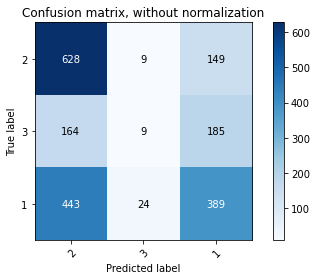

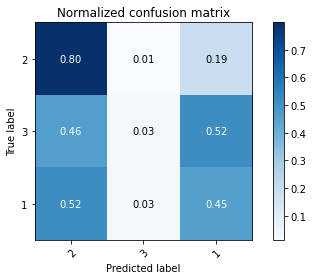

<Figure size 2160x1440 with 0 Axes>

In [27]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred,classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.figure(figsize = (30,20))
plt.show()

In [28]:
acc

0.513

In [29]:
start = time.time()
svc = SVC(kernel='rbf', gamma='scale')#Clasificador (modelo)
fitting = svc.fit(X_train,y_train)#Ajuste del modelo a los datos
y_pred = svc.predict(X_test)#La predicción que te hace el modelo
    
acc = accuracy_score(y_test,y_pred)#Metrica que compara prediccion con realidad

In [30]:
rangos_insulina = pd.unique(y_test)

np.set_printoptions(precision=2)
rangos_insulina

array([2, 3, 1], dtype=int64)

Confusion matrix, without normalization
[[561   0 225]
 [180   0 178]
 [475   0 381]]
Normalized confusion matrix
[[0.71 0.   0.29]
 [0.5  0.   0.5 ]
 [0.55 0.   0.45]]


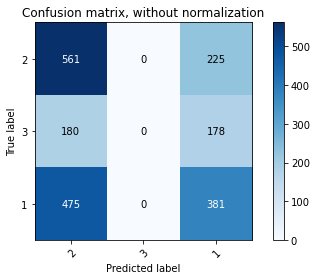

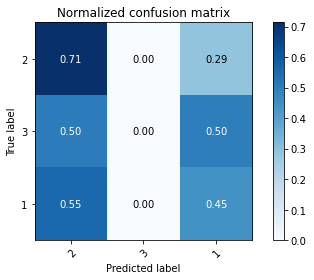

<Figure size 2160x1440 with 0 Axes>

In [31]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.figure(figsize = (30,20))
plt.show()

In [32]:
acc

0.471

In [33]:
start = time.time()
kn = KNeighborsClassifier(n_neighbors=3)#Clasificador (modelo)
fitting = kn.fit(X_train,y_train)#Ajuste del modelo a los datos
y_pred = kn.predict(X_test)#La predicción que te hace el modelo
    
acc = accuracy_score(y_test,y_pred)#Metrica que compara prediccion con realidad

In [34]:
rangos_insulina = pd.unique(y_test)

np.set_printoptions(precision=2)
rangos_insulina

array([2, 3, 1], dtype=int64)

Confusion matrix, without normalization
[[489  60 237]
 [178  34 146]
 [443  89 324]]
Normalized confusion matrix
[[0.62 0.08 0.3 ]
 [0.5  0.09 0.41]
 [0.52 0.1  0.38]]


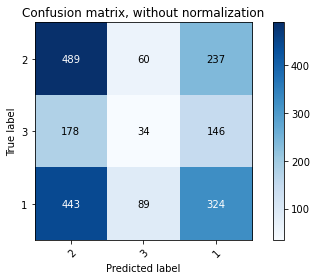

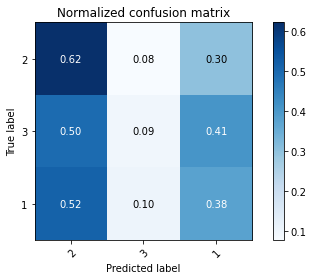

<Figure size 2160x1440 with 0 Axes>

In [35]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.figure(figsize = (30,20))
plt.show()

In [36]:
acc

0.4235

In [37]:
start = time.time()
rf = RandomForestClassifier(n_estimators=100,random_state=0)#Clasificador (modelo)
fitting = rf.fit(X_train,y_train)#Ajuste del modelo a los datos
y_pred = rf.predict(X_test)#La predicción que te hace el modelo
    
acc = accuracy_score(y_test,y_pred)#Metrica que compara prediccion con realidad
print(acc)
confusion_matrix(y_test,y_pred)

0.5015


array([[549,  16, 221],
       [140,  16, 202],
       [374,  44, 438]], dtype=int64)

In [38]:
rangos_insulina = pd.unique(y_test)

np.set_printoptions(precision=2)
rangos_insulina

array([2, 3, 1], dtype=int64)

Confusion matrix, without normalization
[[549  16 221]
 [140  16 202]
 [374  44 438]]
Normalized confusion matrix
[[0.7  0.02 0.28]
 [0.39 0.04 0.56]
 [0.44 0.05 0.51]]


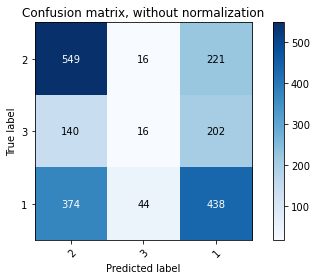

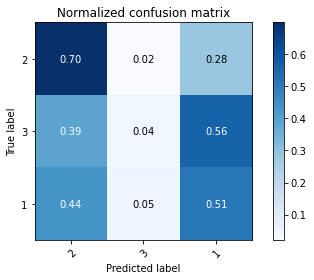

In [39]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y_test, y_pred, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.show()

In [40]:
acc

0.5015

In [41]:
def plot_models(model):
    fig = plt.figure(figsize=(4,4))
    value = 1.5
    width = 0.75
    plot_decision_regions(X_train.values, y_train.values, clf=model, legend=2, 
                      filler_feature_values={2: value, 3: value,
                                             4: value, 5: value, 6: value,7: value},
                      filler_feature_ranges={2: width, 3: width,
                                             4: width, 5: width, 6: width, 7: width})
    return plt.show()

RandomForestClassifier(random_state=0)


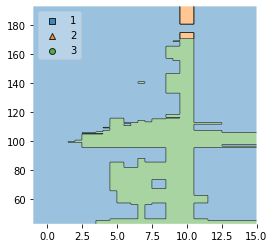

KNeighborsClassifier(n_neighbors=3)


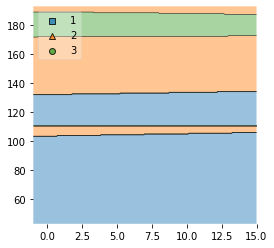

GaussianNB()


C:\Users\NAIN\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


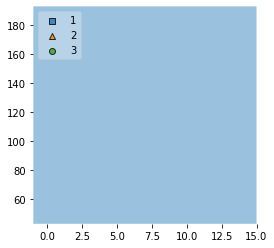

SVC()


C:\Users\NAIN\anaconda3\lib\site-packages\mlxtend\plotting\decision_regions.py:244: UserWarning: No contour levels were found within the data range.
  ax.contour(xx, yy, Z, cset.levels,


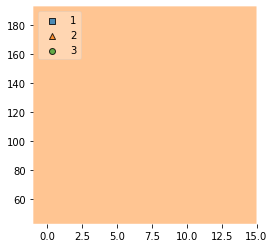

In [42]:
models= [rf,
         kn,
         gnb,
         svc
         ]
for model in models: 
    print(model)
    plot_models(model)

In [43]:
param_grid = {'n_estimators': [10, 100, 500], 
              'max_features': ['auto', 'sqrt', 'log2'],
              'max_depth' : [None,4,5,6,7,8],
              'criterion' :['gini', 'entropy']}

rf = RandomForestClassifier(n_estimators=100,random_state=0)
fitting = rf.fit(X_test,y_test)

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
CV_rfc.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 500}

In [44]:
rf = RandomForestClassifier(n_estimators=500,max_depth=4,max_features= 'log2', criterion='gini')
fitting = rf.fit(X_train,y_train)
y_pred = rf.predict(X_test)
rf.score(X,y)

0.5249

In [45]:
columns = [col for col in dc2.columns if col not in ['rangos de insulina','PatientID']]

X2= dc2.loc[:,dc2.columns != "rangos de insulina"]
y2 = dc2['rangos de insulina'] 

In [46]:
y_demo = rf.predict(X2)

Confusion matrix, without normalization
[[1761    0  290]
 [ 408    0  510]
 [1175    0  856]]
Normalized confusion matrix
[[0.86 0.   0.14]
 [0.44 0.   0.56]
 [0.58 0.   0.42]]


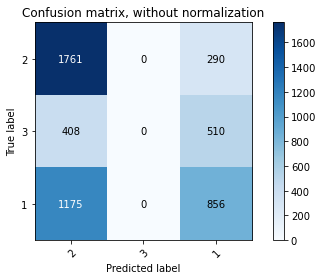

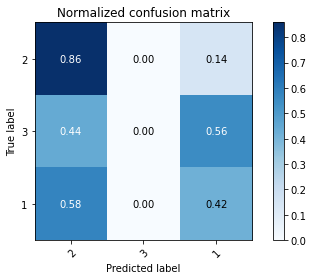

<Figure size 2160x1440 with 0 Axes>

In [47]:
# Plot non-normalized confusion matrix
plot_confusion_matrix(y2, y_demo, classes=rangos_insulina, title='Confusion matrix, without normalization')
# Plot normalized confusion matrix
plot_confusion_matrix(y2, y_demo, classes=rangos_insulina, normalize=True,title='Normalized confusion matrix')
plt.figure(figsize = (30,20))
plt.show()

In [48]:
#Precision, Recall, F1_score

In [49]:
precision=precision_score(y2,y_demo, average='weighted')
precision

C:\Users\NAIN\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.42598552024824904

In [50]:
recall=recall_score(y2,y_demo, average='weighted')
recall

0.5234

In [51]:
fl_s=f1_score(y2,y_demo, average='weighted')
fl_s

0.45640203931706047

In [52]:
metrics_df = pd.DataFrame({'Precision':precision,'Recall':recall,'F1-Score':fl_s}, index=['pred. insulina'])
metrics_df

,Precision,Recall,F1-Score
pred. insulina,0.425986,0.5234,0.456402
